In [1]:
from ase import Atoms
from ase.calculators.lammpslib import LAMMPSlib
from ase.lattice.hexagonal import Graphene
from ase import units
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution, Stationary, ZeroRotation
from ase.md.langevin import Langevin
from ase.md.verlet import VelocityVerlet
from ase.md.md import MolecularDynamics
from ase.io.trajectory import Trajectory

import numpy as np
import matplotlib.pyplot as plt

from autocorrelation import pdos_spectrum
from thermostat import DeltaThermostat
from tqdm.auto import tqdm

In [2]:
cmds = ['pair_style airebo 3.0',
        'pair_coeff * * CH.airebo C']

calc = LAMMPSlib(lmpcmds=cmds, log_file=None, keep_alive=True)

In [3]:
atoms = Atoms(Graphene(symbol='C', latticeconstant={'a':2.46, 'c': 12}))

atoms *= (1,2,1)
atoms.cell[1,0]=0

atoms *= (14,8,1)
atoms.wrap()

atoms.cell

Cell([34.44, 34.086759892955506, 12.0])

In [4]:
atoms.calc = calc

def printenergy(a=atoms):
    """Function to print the potential, kinetic and total energy."""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print(f'Energy per atom: Epot = {epot:.3f} eV  Ekin = {ekin:.3f} eV (T = {ekin / (1.5 * units.kB):.3f} K) '
          f'Etot = {epot + ekin:.3f}eV')

In [5]:
peak_frequencies = 48 #np.arange(10,56,1)
timestep = .5 * units.fs
temperature = 300 * units.kB
loginterval = 1

trajectory = f'trajectories/delta_test.traj'

dyn = DeltaThermostat(atoms, timestep, temperature, 48, trajectory=trajectory)
dyn.attach(printenergy, interval=100)
dyn.run(10000)

Energy per atom: Epot = -7.408 eV  Ekin = 0.000 eV (T = 0.000 K) Etot = -7.408eV
Energy per atom: Epot = -7.408 eV  Ekin = 0.000 eV (T = 0.010 K) Etot = -7.408eV
Energy per atom: Epot = -7.408 eV  Ekin = 0.000 eV (T = 0.063 K) Etot = -7.408eV
Energy per atom: Epot = -7.408 eV  Ekin = 0.000 eV (T = 0.178 K) Etot = -7.408eV
Energy per atom: Epot = -7.408 eV  Ekin = 0.000 eV (T = 0.343 K) Etot = -7.408eV
Energy per atom: Epot = -7.408 eV  Ekin = 0.000 eV (T = 0.580 K) Etot = -7.408eV
Energy per atom: Epot = -7.408 eV  Ekin = 0.000 eV (T = 1.040 K) Etot = -7.408eV
Energy per atom: Epot = -7.408 eV  Ekin = 0.000 eV (T = 1.617 K) Etot = -7.408eV
Energy per atom: Epot = -7.408 eV  Ekin = 0.000 eV (T = 2.180 K) Etot = -7.408eV
Energy per atom: Epot = -7.408 eV  Ekin = 0.000 eV (T = 2.725 K) Etot = -7.407eV
Energy per atom: Epot = -7.408 eV  Ekin = 0.000 eV (T = 3.449 K) Etot = -7.407eV
Energy per atom: Epot = -7.408 eV  Ekin = 0.001 eV (T = 4.646 K) Etot = -7.407eV
Energy per atom: Epot = -7.4

True

Text(0, 0.5, 'PDOS [arb. units]')

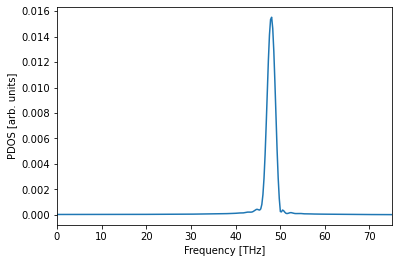

In [371]:
traj = Trajectory('trajectories/test.traj', 'r')[5000:]
data = np.array([atoms.get_velocities() for atoms in traj])

frequencies, intensities = pdos_spectrum(data, timestep, resolution=1024)
plt.plot(frequencies, intensities)
plt.xlim([0,75])
plt.xlabel('Frequency [THz]')
plt.ylabel('PDOS [arb. units]')